# Determining Dimensionality

<img src='../images/chapter2 2.jpeg' />

## Packages

In [87]:
library(psych)
library(tidyverse)
library(DBI)
library(dbplyr)
library(odbc)
library(GPArotation)

## The Big Five Inventory (BFI) dataset

- 2,800 subjects
- 25 questions
- Data collected from the Synthetic Aperture Personality Assessment (SAPA)

In [20]:
data(bfi)
bfi <- bfi[, 1:25]
bfi

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,⋯,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
61617,2,4,3,4,4,2,3,3,4,4,⋯,3,4,2,2,3,3,6,3,4,3
61618,2,4,5,2,5,5,4,4,3,4,⋯,3,3,3,5,5,4,2,4,3,3
61620,5,4,5,4,4,4,5,4,2,5,⋯,4,5,4,2,3,4,2,5,5,2
61621,4,4,6,5,5,4,4,3,5,5,⋯,2,5,2,4,1,3,3,4,3,5
61622,2,3,3,4,5,4,4,5,3,2,⋯,2,3,4,4,3,3,3,4,3,3
61623,6,6,5,6,5,6,6,6,1,3,⋯,3,5,2,2,3,4,3,5,6,1
61624,2,5,5,3,5,5,4,4,2,3,⋯,1,2,2,1,1,5,2,5,6,1
61629,4,3,1,5,1,3,2,4,2,4,⋯,6,3,2,6,4,3,2,4,5,3
61630,4,3,6,3,3,6,6,3,4,5,⋯,5,5,2,3,3,6,6,6,6,1


In [21]:
str(bfi)

'data.frame':	2800 obs. of  25 variables:
 $ A1: int  2 2 5 4 2 6 2 4 4 2 ...
 $ A2: int  4 4 4 4 3 6 5 3 3 5 ...
 $ A3: int  3 5 5 6 3 5 5 1 6 6 ...
 $ A4: int  4 2 4 5 4 6 3 5 3 6 ...
 $ A5: int  4 5 4 5 5 5 5 1 3 5 ...
 $ C1: int  2 5 4 4 4 6 5 3 6 6 ...
 $ C2: int  3 4 5 4 4 6 4 2 6 5 ...
 $ C3: int  3 4 4 3 5 6 4 4 3 6 ...
 $ C4: int  4 3 2 5 3 1 2 2 4 2 ...
 $ C5: int  4 4 5 5 2 3 3 4 5 1 ...
 $ E1: int  3 1 2 5 2 2 4 3 5 2 ...
 $ E2: int  3 1 4 3 2 1 3 6 3 2 ...
 $ E3: int  3 6 4 4 5 6 4 4 NA 4 ...
 $ E4: int  4 4 4 4 4 5 5 2 4 5 ...
 $ E5: int  4 3 5 4 5 6 5 1 3 5 ...
 $ N1: int  3 3 4 2 2 3 1 6 5 5 ...
 $ N2: int  4 3 5 5 3 5 2 3 5 5 ...
 $ N3: int  2 3 4 2 4 2 2 2 2 5 ...
 $ N4: int  2 5 2 4 4 2 1 6 3 2 ...
 $ N5: int  3 5 3 1 3 3 1 4 3 4 ...
 $ O1: int  3 4 4 3 3 4 5 3 6 5 ...
 $ O2: int  6 2 2 3 3 3 2 2 6 1 ...
 $ O3: int  3 4 5 4 4 5 5 4 6 5 ...
 $ O4: int  4 3 5 3 3 6 6 5 6 5 ...
 $ O5: int  3 3 2 5 3 1 1 3 1 2 ...


In [22]:
describe(bfi)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1,1,2784,2.413434,1.407737,2,2.230251,1.4826,1,6,5,0.82504356,-0.30763947,0.02668007
A2,2,2773,4.802380,1.172020,5,4.977017,1.4826,1,6,5,-1.12428533,1.05483862,0.02225666
A3,3,2774,4.603821,1.301834,5,4.788288,1.4826,1,6,5,-0.99845684,0.44204096,0.02471737
A4,4,2781,4.699748,1.479633,5,4.932584,1.4826,1,6,5,-1.03094275,0.04045252,0.02805779
A5,5,2784,4.560345,1.258512,5,4.711849,1.4826,1,6,5,-0.84723335,0.15890562,0.02385189
C1,6,2779,4.502339,1.241347,5,4.640899,1.4826,1,6,5,-0.85470158,0.30442934,0.02354771
C2,7,2776,4.369957,1.318347,5,4.502250,1.4826,1,6,5,-0.74181968,-0.13643987,0.02502188
C3,8,2780,4.303957,1.288552,5,4.417716,1.4826,1,6,5,-0.69145540,-0.13233095,0.02443878
C4,9,2774,2.553353,1.375118,2,2.413514,1.4826,1,6,5,0.59617294,-0.62141881,0.02610879


<img src='../images/chapter2 4.jpeg' />

<img src='../images/chapter2 5.jpeg' />

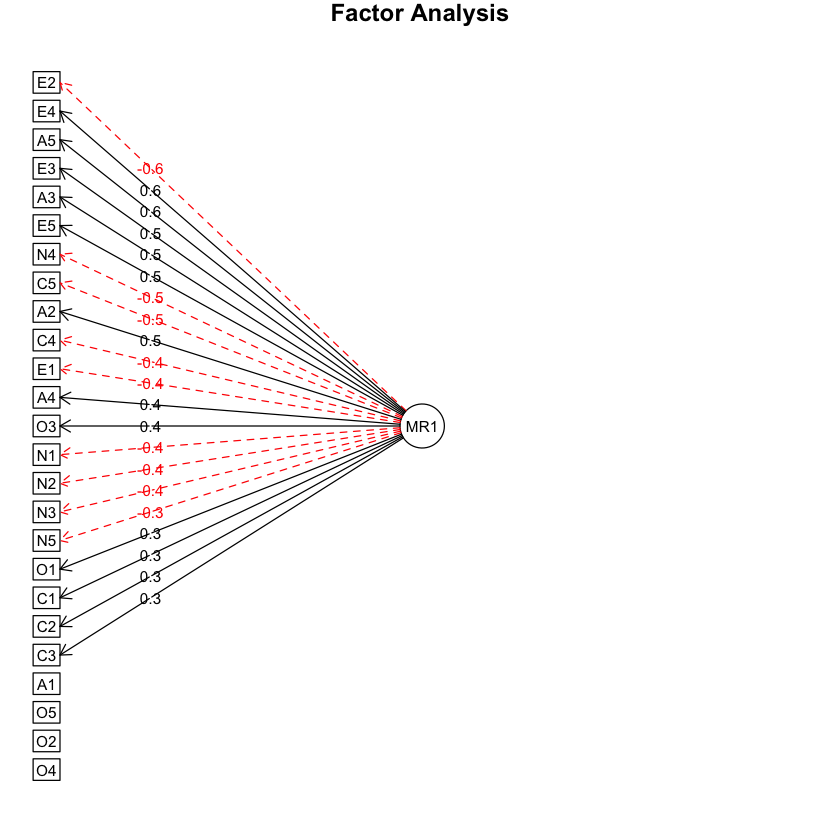

In [23]:
par(bg='white')
bfi_model <- fa(bfi)
fa.diagram(bfi_model)

In [7]:
head(bfi)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,⋯,N4,N5,O1,O2,O3,O4,O5,gender,education,age
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
61617,2,4,3,4,4,2,3,3,4,4,⋯,2,3,3,6,3,4,3,1,NA,16
61618,2,4,5,2,5,5,4,4,3,4,⋯,5,5,4,2,4,3,3,2,NA,18
61620,5,4,5,4,4,4,5,4,2,5,⋯,2,3,4,2,5,5,2,2,NA,17
61621,4,4,6,5,5,4,4,3,5,5,⋯,4,1,3,3,4,3,5,2,NA,17
61622,2,3,3,4,5,4,4,5,3,2,⋯,4,3,3,3,4,3,3,1,NA,17
61623,6,6,5,6,5,6,6,6,1,3,⋯,2,3,4,3,5,6,1,2,3,21


In [24]:
names(bfi)

[1] "A1" "A2" "A3" "A4" "A5" "C1" "C2" "C3" "C4" "C5" "E1" "E2" "E3" "E4" "E5"
[16] "N1" "N2" "N3" "N4" "N5" "O1" "O2" "O3" "O4" "O5"

In [25]:
# Establish two sets of indices to split the dataset
N <- nrow(bfi)
indices <- seq(1, N)
indices_EFA <- sample(indices, floor((.5*N)))
indices_CFA <- indices[!(indices %in% indices_EFA)]

# Use those indices to split the dataset into halves for your EFA and CFA
bfi_EFA <- bfi[indices_EFA, ]
bfi_CFA <- bfi[indices_CFA, ]

In [26]:
head(bfi_EFA)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,⋯,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
67346,2,5,5,5,5,3,6,3,2,6,⋯,1,2,3,3,5,3,2,4,6,2
67180,NA,2,2,5,2,5,2,5,4,5,⋯,6,6,5,2,6,6,2,5,5,1
64036,2,6,4,6,5,4,5,5,2,2,⋯,2,2,5,4,3,5,4,3,6,3
65408,3,4,3,5,4,5,5,4,3,2,⋯,4,4,2,3,2,6,1,5,6,1
62316,2,6,5,5,6,4,6,5,1,2,⋯,1,2,3,NA,2,5,2,6,4,2
64483,2,1,3,4,6,6,5,5,1,1,⋯,2,6,1,1,1,6,1,6,6,1


In [27]:
head(bfi_CFA)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,⋯,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
61618,2,4,5,2,5,5,4,4,3,4,⋯,3,3,3,5,5,4,2,4,3,3
61620,5,4,5,4,4,4,5,4,2,5,⋯,4,5,4,2,3,4,2,5,5,2
61621,4,4,6,5,5,4,4,3,5,5,⋯,2,5,2,4,1,3,3,4,3,5
61622,2,3,3,4,5,4,4,5,3,2,⋯,2,3,4,4,3,3,3,4,3,3
61623,6,6,5,6,5,6,6,6,1,3,⋯,3,5,2,2,3,4,3,5,6,1
61629,4,3,1,5,1,3,2,4,2,4,⋯,6,3,2,6,4,3,2,4,5,3


In [28]:
str(bfi_EFA)

'data.frame':	1400 obs. of  25 variables:
 $ A1: int  2 NA 2 3 2 2 2 1 4 2 ...
 $ A2: int  5 2 6 4 6 1 5 5 6 5 ...
 $ A3: int  5 2 4 3 5 3 5 6 4 4 ...
 $ A4: int  5 5 6 5 5 4 5 5 5 6 ...
 $ A5: int  5 2 5 4 6 6 5 5 5 4 ...
 $ C1: int  3 5 4 5 4 6 6 5 5 5 ...
 $ C2: int  6 2 5 5 6 5 6 5 4 3 ...
 $ C3: int  3 5 5 4 5 5 5 5 2 4 ...
 $ C4: int  2 4 2 3 1 1 1 1 2 3 ...
 $ C5: int  6 5 2 2 2 1 2 1 6 3 ...
 $ E1: int  3 1 4 6 3 1 2 4 1 3 ...
 $ E2: int  6 1 2 6 2 1 2 4 1 3 ...
 $ E3: int  4 5 6 2 5 6 4 4 5 4 ...
 $ E4: int  3 4 6 2 5 6 5 2 6 5 ...
 $ E5: int  3 6 3 3 5 6 5 5 6 4 ...
 $ N1: int  1 6 2 4 1 2 2 3 4 2 ...
 $ N2: int  2 6 2 4 2 6 2 3 5 2 ...
 $ N3: int  3 5 5 2 3 1 3 5 6 2 ...
 $ N4: int  3 2 4 3 NA 1 2 5 3 4 ...
 $ N5: int  5 6 3 2 2 1 2 1 5 3 ...
 $ O1: int  3 6 5 6 5 6 5 6 5 3 ...
 $ O2: int  2 2 4 1 2 1 1 1 4 3 ...
 $ O3: int  4 5 3 5 6 6 5 6 4 4 ...
 $ O4: int  6 5 6 6 4 6 5 6 5 5 ...
 $ O5: int  2 1 3 1 2 1 2 1 4 4 ...


# An Empirical Approach to Dimensionality

Without a theory, we can use Eigenvalues to discover factors.

<img src='../images/chapter2 7.jpeg' />

## 1. Calculate the correlation matrix first 

In [29]:

bfi_efa_cor <- cor(bfi_EFA, use = "pairwise.complete.obs")

In [30]:
bfi_efa_cor

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,⋯,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
A1,1.00000000,-0.37459108,-0.29536387,-0.16475029,-0.18587320,0.01715764,0.013387824,-0.03025039,0.13607115,0.03852399,⋯,0.15051717,0.116363807,0.094028726,0.03481428,0.02944501,-0.01397160,0.08033178,-0.06933706,-0.10573465,0.11861957
A2,-0.37459108,1.00000000,0.48642592,0.32126375,0.39044897,0.07603101,0.121697401,0.18577764,-0.13996949,-0.11313093,⋯,-0.08492500,-0.050749195,-0.051271654,-0.06887755,0.01267314,0.12297564,0.02184215,0.15291270,0.07249526,-0.07467294
A3,-0.29536387,0.48642592,1.00000000,0.36325081,0.48764868,0.08130030,0.139167860,0.13646463,-0.12917208,-0.15706901,⋯,-0.11065857,-0.129215860,-0.057418464,-0.14008729,-0.05005207,0.14831934,0.01964602,0.18169390,0.04434805,-0.01765869
A4,-0.16475029,0.32126375,0.36325081,1.00000000,0.31077545,0.11605033,0.249405357,0.13978203,-0.16162533,-0.24223336,⋯,-0.12407925,-0.157226040,-0.051337086,-0.15973767,-0.02593077,0.06289938,0.03992499,0.05139958,-0.03752890,0.04331956
A5,-0.18587320,0.39044897,0.48764868,0.31077545,1.00000000,0.09272215,0.114648406,0.16006570,-0.11514405,-0.20262909,⋯,-0.22238028,-0.223361696,-0.165275119,-0.22623639,-0.08775699,0.17739782,0.01714266,0.20858377,0.02971173,-0.03319099
C1,0.01715764,0.07603101,0.08130030,0.11605033,0.09272215,1.00000000,0.395820339,0.29191065,-0.33450959,-0.24561530,⋯,-0.05544414,-0.023403790,-0.033204629,-0.08175092,-0.06795148,0.17701009,-0.11357861,0.19105227,0.10574182,-0.17018727
C2,0.01338782,0.12169740,0.13916786,0.24940536,0.11464841,0.39582034,1.000000000,0.34223036,-0.36561134,-0.28061631,⋯,-0.01368632,0.003105637,0.008709209,-0.04834008,0.02943685,0.15777785,-0.02530046,0.19145175,0.05528337,-0.08059259
C3,-0.03025039,0.18577764,0.13646463,0.13978203,0.16006570,0.29191065,0.342230356,1.00000000,-0.31390720,-0.32686553,⋯,-0.08636690,-0.081871724,-0.066950045,-0.11868774,-0.04790561,0.14708136,-0.06061732,0.07819237,0.03145036,-0.04008523
C4,0.13607115,-0.13996949,-0.12917208,-0.16162533,-0.11514405,-0.33450959,-0.365611336,-0.31390720,1.00000000,0.46990523,⋯,0.18745708,0.138040213,0.200546178,0.27018308,0.19973598,-0.11981918,0.19672370,-0.07413198,0.04761170,0.20035485
C5,0.03852399,-0.11313093,-0.15706901,-0.24223336,-0.20262909,-0.24561530,-0.280616307,-0.32686553,0.46990523,1.00000000,⋯,0.18331993,0.227772696,0.253371188,0.38828779,0.18443913,-0.09352177,0.14581790,-0.05508291,0.15255315,0.05911952


## 2. Calculate Eigenvalues

In [31]:
eigenvals <- eigen(bfi_efa_cor)
eigenvals$values

[1] 5.0171144 2.6779603 2.1926936 1.8057768 1.5460089 1.1539743 0.8476200
 [8] 0.8218810 0.7613187 0.6844294 0.6569691 0.6523558 0.6367079 0.6075747
[15] 0.5850053 0.5443798 0.5279485 0.4842543 0.4674969 0.4562315 0.4277005
[22] 0.4246331 0.3943112 0.3572247 0.2684292

## 3. Create Scree Plot to Determine Number of Factors

### A. Eigenvalues in BFI Dataset

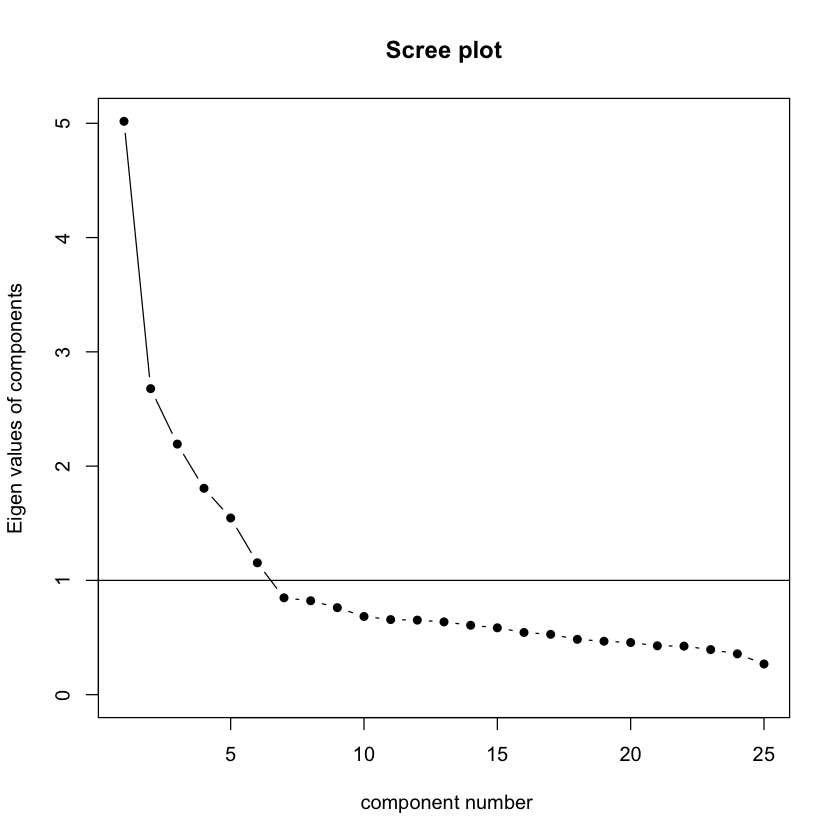

In [33]:
par(bg = 'white')
scree(bfi_efa_cor, factors=F)

### B. Eigenvalues in UFC Dataset

In [50]:
con <- dbConnect(
    RPostgres::Postgres(),
    dbname = 'ufc'
)

In [175]:
ufc <- dbReadTable(con, 'wrangled_ufc_fights')
ufc <- ufc %>%
    filter(outcome == 'W')
ufc <- ufc[, c('body', 
        'body_attempts', 
        'clinch', 
        'clinch_attempts', 
        'distance',
        'distance_attempts',
        'ground',
        'ground_attempts',
        'head',
        'head_attempts',
        'knockdowns',
        'leg',
        'leg_attempts',
        'pass',
        'reversals',
        'sig_attempts',
        'sig_strikes',
        'strike_attempts',
        'strikes',
        'sub_attempts',
        'takedowns',
        'td_attempts')]
ufc <- ufc[complete.cases(ufc), ]

In [176]:
str(ufc)

'data.frame':	5090 obs. of  22 variables:
 $ body             : int  0 3 0 0 1 0 0 0 0 1 ...
 $ body_attempts    : int  0 4 0 0 1 0 1 0 0 1 ...
 $ clinch           : int  0 4 0 0 0 0 0 0 1 1 ...
 $ clinch_attempts  : int  0 9 0 0 0 0 0 0 1 1 ...
 $ distance         : int  1 4 0 0 5 0 3 0 0 0 ...
 $ distance_attempts: int  3 10 3 0 8 0 9 1 0 0 ...
 $ ground           : int  2 7 0 1 6 0 0 1 0 0 ...
 $ ground_attempts  : int  2 8 0 1 9 0 0 1 0 0 ...
 $ head             : int  3 12 0 1 7 0 3 1 1 0 ...
 $ head_attempts    : int  5 23 1 1 13 0 7 1 1 0 ...
 $ knockdowns       : int  0 2 0 0 1 0 0 0 0 0 ...
 $ leg              : int  0 0 0 0 3 0 0 0 0 0 ...
 $ leg_attempts     : int  0 0 2 0 3 0 1 1 0 0 ...
 $ pass             : int  0 0 2 0 0 2 1 2 1 0 ...
 $ reversals        : int  0 0 0 0 0 1 0 0 0 0 ...
 $ sig_attempts     : int  5 27 3 1 17 0 9 2 1 1 ...
 $ sig_strikes      : int  3 15 0 1 11 0 3 1 1 1 ...
 $ strike_attempts  : int  5 53 7 4 17 12 9 4 2 1 ...
 $ strikes          : int  3 

In [177]:
describe(ufc)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
body,1,5090,7.3968566,8.3569458,5,5.90422397,5.9304,0,92,92,2.139773,7.4564912,0.117135543
body_attempts,2,5090,10.4033399,11.4644267,7,8.40913556,8.8956,0,101,101,2.055846,6.3912693,0.160691702
clinch,3,5090,6.1958743,8.6694694,3,4.41404715,4.4478,0,95,95,2.793029,12.0632174,0.121516046
clinch_attempts,4,5090,8.8622790,11.8597826,5,6.48379175,7.4130,0,115,115,2.671604,10.8368232,0.166233227
distance,5,5090,24.2473477,27.1656765,15,19.38826130,17.7912,0,281,281,2.043623,6.3440512,0.380769044
distance_attempts,6,5090,61.8131631,65.4255134,39,50.55771120,45.9606,0,479,479,1.661900,3.1878990,0.917039934
ground,7,5090,8.4096267,11.3347823,4,6.09847741,5.9304,0,100,100,2.539186,9.1217660,0.158874535
ground_attempts,8,5090,12.3082515,16.5201685,6,8.90471513,8.8956,0,136,136,2.423498,7.8391291,0.231555756
head,9,5090,25.6766208,21.9112060,20,22.58914538,17.7912,0,244,244,1.812798,6.0338318,0.307119499


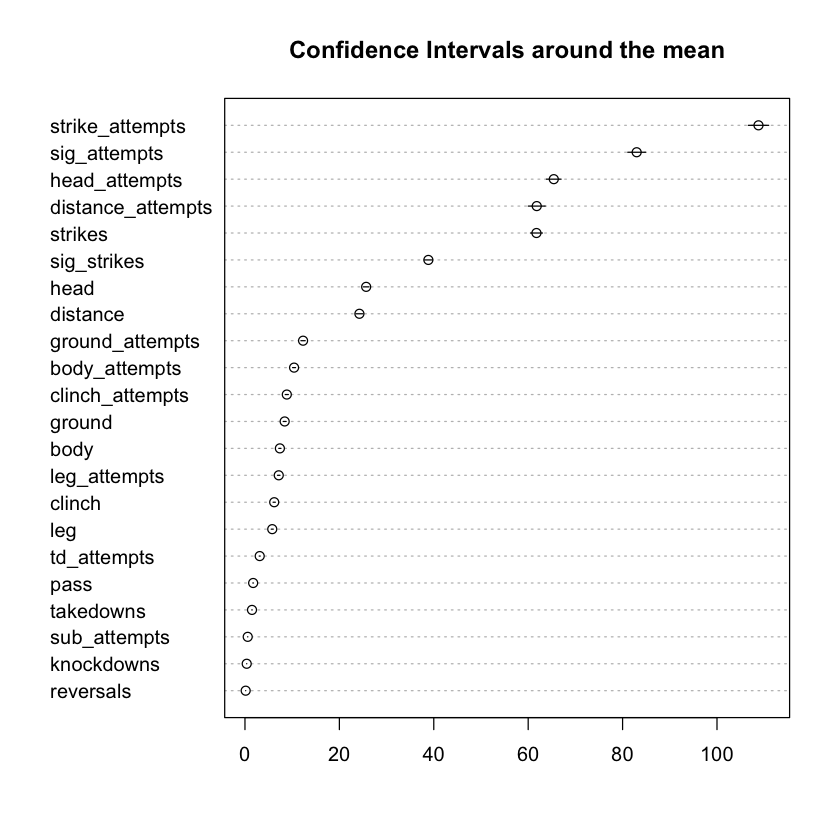

In [190]:
par(bg = 'white')
error.dots(ufc)

In [178]:
ufc_cor <- cor(ufc)

In [180]:
lowerCor(ufc)

                  body  bdy_t clnch clnc_ dstnc dstn_ grond grnd_ head  hd_tt
body               1.00                                                      
body_attempts      0.96  1.00                                                
clinch             0.59  0.52  1.00                                          
clinch_attempts    0.57  0.52  0.97  1.00                                    
distance           0.62  0.67  0.25  0.27  1.00                              
distance_attempts  0.57  0.65  0.22  0.26  0.94  1.00                        
ground             0.09  0.02  0.02  0.00 -0.16 -0.18  1.00                  
ground_attempts    0.06  0.01  0.00  0.00 -0.17 -0.17  0.97  1.00            
head               0.52  0.52  0.38  0.40  0.80  0.75  0.32  0.30  1.00      
head_attempts      0.54  0.59  0.31  0.35  0.87  0.94  0.09  0.11  0.89  1.00
knockdowns        -0.10 -0.10 -0.07 -0.07 -0.02 -0.05 -0.07 -0.06 -0.03 -0.06
leg                0.40  0.45  0.31  0.30  0.60  0.56 -0.08 -0.0

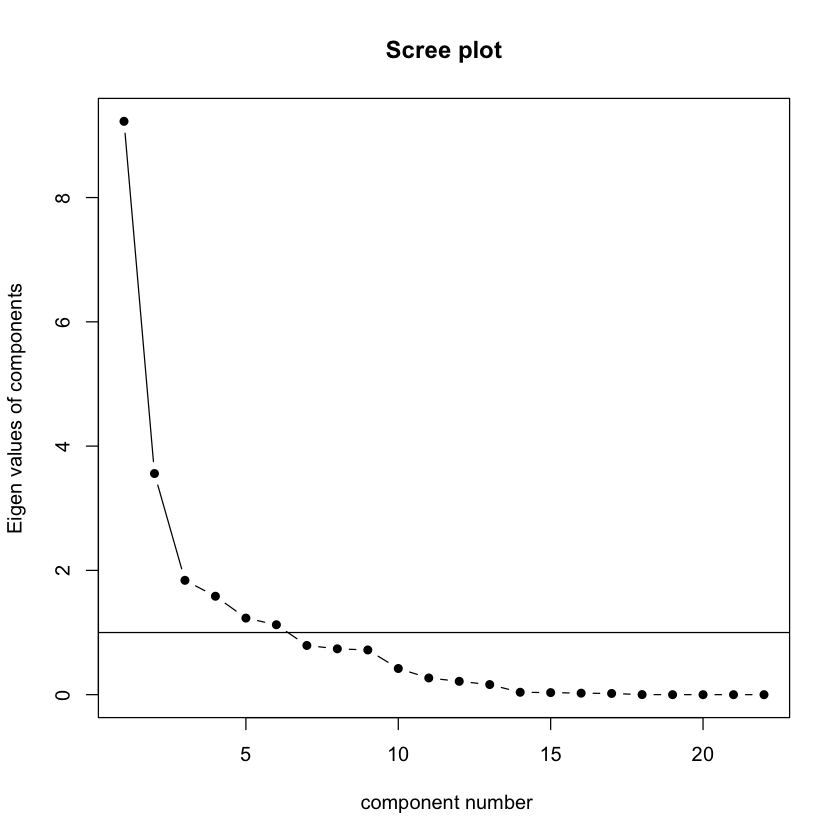

In [188]:
par(bg = 'white')
scree(ufc_cor, factors = F)

# Understanding Multidimensional Data

## Factors = Constructs

**Construct**: an attribute of interest
- Can't be directly measured
- Examples:
    - Self-determination
    - Reasoning ability
    - Political affiliation
    - Extraversion

Factors are the mathematical counterparts of constructs. They provide justification for our theories.

<img src='../images/chapter2 15.jpeg' />

## Interpreting Exploratory Analyses

In the absence of a hypothesized theory, we use Eigenvalue to guide our exploration.

<img src='../images/chapter2 17.jpeg' />

## Interpreting Confirmatory Analyses

During confirmatory factor analysis, we confirm the strength of hypothesized relationships between constructs and the items they were designed to measure.

<img src='../images/chapter2 16.jpeg' />

## Running a Multidimensional EFA

### BFI Factor Diagram

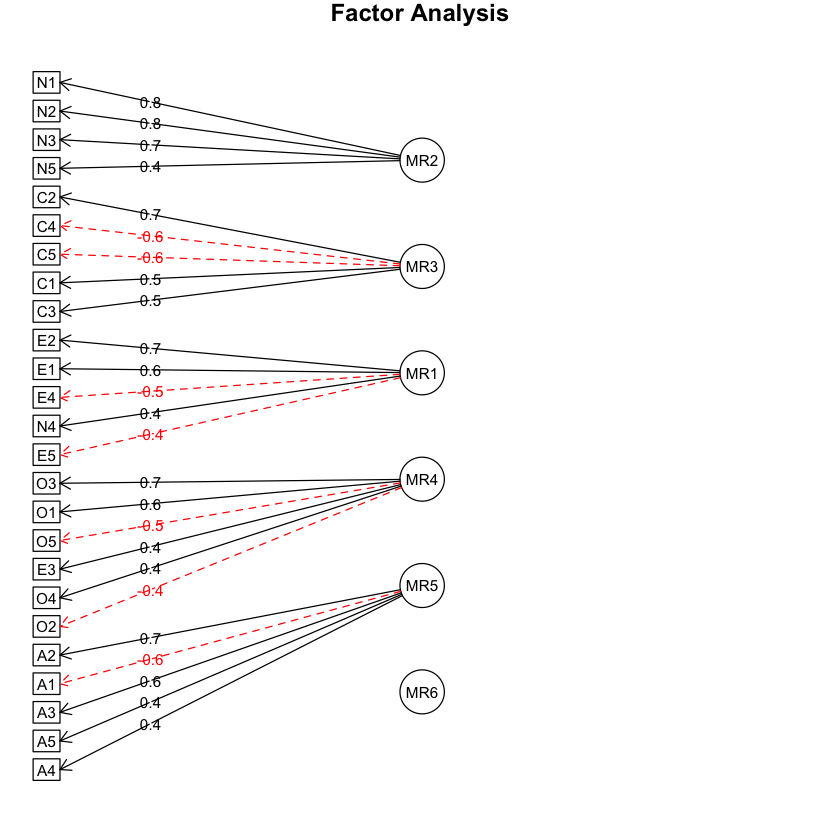

In [181]:
# Run the EFA with six factors (as indicated by your scree plot)
par(bg = 'white')
EFA_model <- fa(bfi_EFA, nfactors = 6)
fa.diagram(EFA_model)

In [189]:
EFA_model

Factor Analysis using method =  minres
Call: fa(r = bfi_EFA, nfactors = 6)
Standardized loadings (pattern matrix) based upon correlation matrix
     MR2   MR3   MR1   MR4   MR5   MR6   h2   u2 com
A1  0.07  0.07 -0.10  0.02 -0.62  0.28 0.39 0.61 1.5
A2  0.05  0.07 -0.06  0.00  0.69 -0.02 0.51 0.49 1.1
A3 -0.05  0.05 -0.12  0.05  0.58  0.17 0.50 0.50 1.3
A4 -0.07  0.24 -0.05 -0.11  0.36  0.18 0.29 0.71 2.7
A5 -0.18  0.03 -0.22  0.12  0.39  0.27 0.48 0.52 3.2
C1  0.03  0.52  0.06  0.18 -0.06  0.05 0.31 0.69 1.3
C2  0.08  0.67  0.15  0.09  0.00  0.20 0.48 0.52 1.4
C3 -0.01  0.51  0.06  0.02  0.07  0.08 0.28 0.72 1.1
C4  0.05 -0.64  0.05  0.04 -0.09  0.29 0.54 0.46 1.5
C5  0.14 -0.56  0.19  0.11  0.00  0.07 0.44 0.56 1.5
E1 -0.13  0.12  0.58 -0.08 -0.12  0.09 0.36 0.64 1.4
E2  0.04 -0.02  0.67 -0.07 -0.08  0.01 0.53 0.47 1.1
E3  0.00  0.00 -0.35  0.43  0.11  0.27 0.52 0.48 2.8
E4 -0.06  0.04 -0.54 -0.03  0.16  0.30 0.54 0.46 1.8
E5  0.18  0.28 -0.36  0.25  0.08  0.01 0.39 0.61 3.4
N1  0.84

Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“ A loading greater than abs(1) was detected.  Examine the loadings carefully.”Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor extraction method.”In factor.scores, the correlation matrix is singular, an approximation is used
Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”

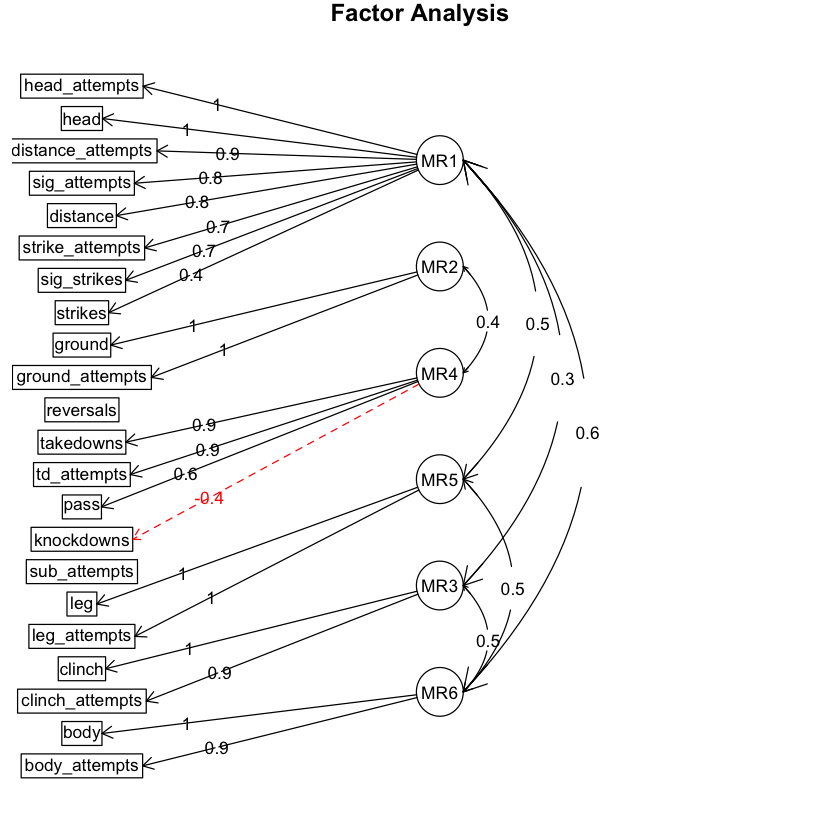

In [192]:
par(bg = 'white')
ufc_norm <- as.data.frame(scale(ufc))
ufc_model <- fa(ufc, nfactors=6)
fa.diagram(ufc_model)

## Factor Loadings

In [182]:
EFA_model$loadings


Loadings:
   MR2    MR3    MR1    MR4    MR5    MR6   
A1                             -0.622  0.275
A2                              0.689       
A3               -0.116         0.583  0.166
A4         0.238        -0.114  0.356  0.181
A5 -0.184        -0.217  0.117  0.389  0.271
C1         0.517         0.184              
C2         0.665  0.146                0.196
C3         0.513                            
C4        -0.641                       0.292
C5  0.137 -0.559  0.191  0.110              
E1 -0.131  0.120  0.578        -0.124       
E2                0.673                     
E3               -0.352  0.426  0.110  0.273
E4               -0.538         0.163  0.303
E5  0.178  0.283 -0.360  0.249              
N1  0.845        -0.111                     
N2  0.828                                   
N3  0.677         0.118                0.123
N4  0.414 -0.156  0.439                     
N5  0.424         0.227 -0.114  0.141  0.190
O1                       0.555              

In [193]:
ufc_model$loadings


Loadings:
                  MR1    MR2    MR4    MR5    MR3    MR6   
body                                                  0.979
body_attempts                                         0.908
clinch                                         0.970       
clinch_attempts                                0.938       
distance           0.800 -0.196         0.155 -0.122  0.168
distance_attempts  0.881 -0.255         0.106 -0.143  0.120
ground                    0.989                            
ground_attempts           0.956                            
head               0.966  0.222        -0.118  0.149       
head_attempts      1.021                                   
knockdowns                      -0.371               -0.127
leg                                     1.003              
leg_attempts                            0.995              
pass              -0.113  0.301  0.550        -0.139       
reversals                 0.122                            
sig_attempts       0.847     

## Factor Scores

Each column represents the factor score for each construct. We do not want to interpret factor scores until we have a theory, however. Once we have a working theory, we can start making inferences about our constructs.

In [194]:
head(EFA_model$scores)

,MR2,MR3,MR1,MR4,MR5,MR6
67346,-0.63753828,-0.4579134,1.33286812,-0.3091625,0.4494374,0.04700238
67180,NA,NA,NA,NA,NA,NA
64036,-0.26555704,0.3242077,-0.07994531,-0.3217161,0.6831291,1.04683288
65408,0.02683612,0.2921563,1.58663864,0.3736744,-1.1046377,-1.04041473
62316,NA,NA,NA,NA,NA,NA
64483,-0.27581678,1.1310295,-1.53626657,1.5783028,-1.2550731,-0.63771794


# Investigating Model Fit

<img src='../images/chapter2 15.jpeg' />

<img src='../images/chapter2 15.jpeg' />

<img src='../images/chapter2 15.jpeg' />

<img src='../images/chapter2 15.jpeg' />

<img src='../images/chapter2 15.jpeg' />

<img src='../images/chapter2 15.jpeg' />

<img src='../images/chapter2 15.jpeg' />

<img src='../images/chapter2 15.jpeg' />

<img src='../images/chapter2 15.jpeg' />

<img src='../images/chapter2 15.jpeg' />

<img src='../images/chapter2 15.jpeg' />

<img src='../images/chapter2 15.jpeg' />

<img src='../images/chapter2 15.jpeg' />

<img src='../images/chapter2 15.jpeg' />

In [84]:
list.files('../images')

[1] "chapter1 10.jpeg"                         
  [2] "chapter1 11.jpeg"                         
  [3] "chapter1 12.jpeg"                         
  [4] "chapter1 13.jpeg"                         
  [5] "chapter1 14.jpeg"                         
  [6] "chapter1 15.jpeg"                         
  [7] "chapter1 16.jpeg"                         
  [8] "chapter1 17.jpeg"                         
  [9] "chapter1 18.jpeg"                         
 [10] "chapter1 19.jpeg"                         
 [11] "chapter1 2.jpeg"                          
 [12] "chapter1 20.jpeg"                         
 [13] "chapter1 21.jpeg"                         
 [14] "chapter1 22.jpeg"                         
 [15] "chapter1 23.jpeg"                         
 [16] "chapter1 24.jpeg"                         
 [17] "chapter1 25.jpeg"                         
 [18] "chapter1 26.jpeg"                         
 [19] "chapter1 27.jpeg"                         
 [20] "chapter1 28.jpeg"                         
 [21] "chapter1 29.jpeg"                         
 [22] "chapter1 3.jpeg"                          
 [23] "chapter1 30.jpeg"                         
 [24] "chapter1 4.jpeg"                          
 [25] "chapter1 5.jpeg"                          
 [26] "chapter1 6.jpeg"                          
 [27] "chapter1 7.jpeg"                          
 [28] "chapter1 8.jpeg"                          
 [29] "chapter1 9.jpeg"                          
 [30] "chapter1.jpeg"                            
 [31] "chapter1.pdf"                             
 [32] "chapter2 10.jpeg"                         
 [33] "chapter2 11.jpeg"                         
 [34] "chapter2 12.jpeg"                         
 [35] "chapter2 13.jpeg"                         
 [36] "chapter2 14.jpeg"                         
 [37] "chapter2 15.jpeg"                         
 [38] "chapter2 16.jpeg"                         
 [39] "chapter2 17.jpeg"                         
 [40] "chapter2 18.jpeg"                         
 [41] "chapter2 19.jpeg"                         
 [42] "chapter2 2.jpeg"                          
 [43] "chapter2 20.jpeg"                         
 [44] "chapter2 21.jpeg"                         
 [45] "chapter2 22.jpeg"                         
 [46] "chapter2 23.jpeg"                         
 [47] "chapter2 24.jpeg"                         
 [48] "chapter2 25.jpeg"                         
 [49] "chapter2 26.jpeg"                         
 [50] "chapter2 27.jpeg"                         
 [51] "chapter2 28.jpeg"                         
 [52] "chapter2 3.jpeg"                          
 [53] "chapter2 4.jpeg"                          
 [54] "chapter2 5.jpeg"                          
 [55] "chapter2 6.jpeg"                          
 [56] "chapter2 7.jpeg"                          
 [57] "chapter2 8.jpeg"                          
 [58] "chapter2 9.jpeg"                          
 [59] "chapter2.jpeg"                            
 [60] "chapter2.pdf"                             
 [61] "chapter3 10.jpeg"                         
 [62] "chapter3 11.jpeg"                         
 [63] "chapter3 12.jpeg"                         
 [64] "chapter3 13.jpeg"                         
 [65] "chapter3 14.jpeg"                         
 [66] "chapter3 15.jpeg"                         
 [67] "chapter3 16.jpeg"                         
 [68] "chapter3 17.jpeg"                         
 [69] "chapter3 18.jpeg"                         
 [70] "chapter3 19.jpeg"                         
 [71] "chapter3 2.jpeg"                          
 [72] "chapter3 20.jpeg"                         
 [73] "chapter3 21.jpeg"                         
 [74] "chapter3 22.jpeg"                         
 [75] "chapter3 3.jpeg"                          
 [76] "chapter3 4.jpeg"                          
 [77] "chapter3 5.jpeg"                          
 [78] "chapter3 6.jpeg"                          
 [79] "chapter3 7.jpeg"                          
 [80] "chapter3 8.jpeg"                          
 [